#### 합성곱 사전준비

In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
import statsmodels.api as sm # 쓰지는 않는다.
import sklearn as sk

#한글/차트 마이너스 없애기

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

#### 합성곱 신경망 이미지 분류

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data 
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target), (test_input, test_target) = load_data()

In [4]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled.shape

(60000, 28, 28, 1)

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
train_scaled.shape

(48000, 28, 28, 1)

In [7]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 생성

In [8]:
model = keras.Sequential() # 순차

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1))) # relu가 가장 간단하고 편리해서 사용.
model.add(keras.layers.MaxPooling2D(2)) # 14*14 특성맵이 만들어진다 -> 32개
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 7*7 특성맵 -> 62개

In [9]:
model.add(keras.layers.Flatten())  # 7*7*64 + 64
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) # 60개 노드만 통과
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [11]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


#### 모델 컴파일 훈련

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True, verbose=1)
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.5214 - accuracy: 0.8144
Epoch 1: val_loss improved from inf to 0.33507, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.5211 - accuracy: 0.8144 - val_loss: 0.3351 - val_accuracy: 0.8783
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3467 - accuracy: 0.8765
Epoch 2: val_loss improved from 0.33507 to 0.28640, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3466 - accuracy: 0.8766 - val_loss: 0.2864 - val_accuracy: 0.8933
Epoch 3/20
1498/1500 [============================>.] - ETA: 0s - loss: 0.2944 - accuracy: 0.8940
Epoch 3: val_loss improved from 0.28640 to 0.25014, saving model to ./data\best_cnn_model.h5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2942 - accuracy: 0.8940 - val_loss: 0.2501 - val_accuracy: 0.9077
Epoch 4/20
1499/1500 [====

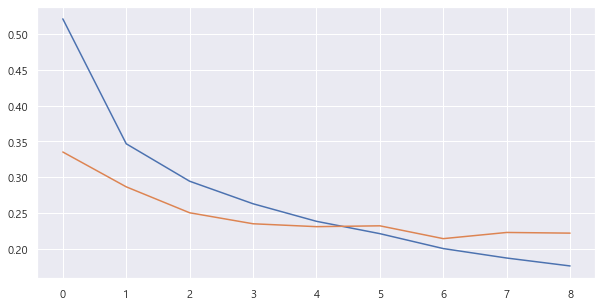

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [15]:
early_stopping_cb.stopped_epoch

8

In [17]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 8ms/step - loss: 0.2140 - accuracy: 0.9248


[0.21399100124835968, 0.924833357334137]

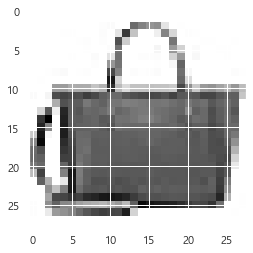

In [18]:
plt.imshow(X=val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [19]:
# 예측
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 195ms/step


array([[2.73243274e-14, 1.06335994e-19, 5.66216048e-17, 4.83402391e-16,
        4.36272889e-17, 2.65304219e-17, 6.99184236e-15, 2.18905435e-16,
        1.00000000e+00, 4.17050858e-18]], dtype=float32)

In [20]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels

1/1 [==============================] - 0s 24ms/step


array([8], dtype=int64)

In [21]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [22]:
print(classes[np.argmax(result)])

가방
